In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Ejercicio 5.4: El límite de difracción de un telescopio

In [0]:
from numpy import loadtxt, sum, array, linspace, exp, arange, pi, cos, sin, sqrt, empty, log
from math import factorial, tanh, cosh
from pylab import plot, show, xlabel, ylabel, imshow, hot, xlim, ylim, gray

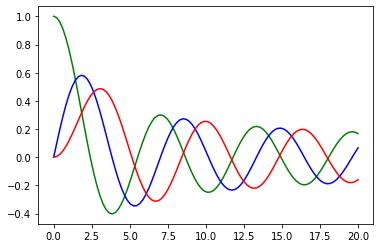

In [3]:
#parte a
def J(m, x):
     def f(m, x, theta):
         return cos(m*theta - x* sin(theta))

     N = 1000
     a = 0
     b = pi
     h = (b - a) / N

     oddSum = 0
     for k in range(1, N, 2):
         oddSum += f(m, x, a + k*h)

     evenSum = 0
     for k in range(1, N, 2):
         evenSum += f(m, x, a + k*h)

     return 1 / pi * 1 / 3 * h * (f(m, x, a) + f(m, x, b) + 4 * oddSum + 2 * evenSum)

# Plot J0, J1, J2
xpoints = linspace(0, 20, 100) 
J0 = []    # matrices vacias
J1 = []
J2 = []
for x in xpoints:
     J0.append(J(0, x))
     J1.append(J(1, x))
     J2.append(J(2, x))

plot(xpoints, J0, "g")
plot(xpoints, J1, "b")
plot(xpoints, J2, "r")
show()

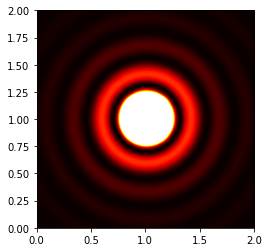

In [4]:
def r(x, y):
     return sqrt(x**2 + y**2)

def I(r):
     if (r == 0):
         return 1/4

     Lambda = 0.5  # en micrómetros
     kr = 2 * pi / Lambda * r
     return (J(1,kr)/ kr)**2

side = 2          # longitud en micrómetros
points = 200      # número de puntos de cuadrícula en cada dirección
spacing = side/points

# Calculamos la posicion del centro
xCenter = side/2
yCenter = side/2

# Hacer una matriz vacía para almacenar valores
intensities = empty([points, points], float)

#  Calculamos  los valores en la matriz
for i in range(points):
     y = spacing * i
     for j in range(points):
         x = spacing * j
         dist = r(x - xCenter, y - yCenter)
         intensities[i, j] = I(dist)

imshow(intensities, origin="lower", extent=[0,side,0,side], vmax=0.01)
hot()
show()
